<a href="https://colab.research.google.com/github/Homerox710/Pandas/blob/main/11_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/Pandas/db'
!ls

/content/drive/.shortcut-targets-by-id/13AsTOToO6kN2KDB4By57LFgFm-DTWO8i/db
API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv	Meteorite_Landings.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv	poblacion.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv	test.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv	test.hdf
API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv	test.json
covid_19_data.csv				test.parquet
flights.db					test.pkl
GlobalLandTemperaturesByCountry.csv		test.xlsx
london_merged.csv


In [4]:
import pandas as pd
pd.__version__

'1.3.5'

In [9]:
df = pd.read_csv('covid_19_data.csv')
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3088,3089,03/03/2020,Guangdong,Mainland China,2020-03-03T10:23:10,1350.0,7.0,1101.0
2230,2231,02/24/2020,NaN,Iran,2020-02-24T11:13:10,61.0,12.0,0.0
2052,2053,02/22/2020,Liaoning,Mainland China,2020-02-22T02:23:05,121.0,1.0,66.0
274,275,01/28/2020,Anhui,Mainland China,1/28/20 23:00,106.0,0.0,0.0
918,919,02/07/2020,Beijing,Mainland China,2020-02-07T03:23:02,297.0,1.0,33.0
1191,1192,02/10/2020,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
2027,2028,02/22/2020,Guangdong,Mainland China,2020-02-22T10:03:04,1339.0,5.0,728.0
2236,2237,02/24/2020,NaN,Germany,2020-02-21T23:03:13,16.0,0.0,14.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
1409,1410,02/13/2020,"Los Angeles, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0


Convertimos el tipo de dato de la celda Observation date en datetime

In [10]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [11]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

Sólo vamos a utilizar estas columnas

In [13]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


Creamos un nuevo df agrupado por medio de ObservationDate

In [14]:
# Así podemos ver el número de casos confirmados, muertes y recuperados por día
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Creamos 2 series, uno con una muestra de los casos confirmadosy el segundo con las muertes

In [16]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [17]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

Cuando tenemos 2 series con un sistema de índices por fecha, podemos hacer este tipo de operaciones

In [18]:
# Acá le restamos el número de muertos al número de casos confirmados (Recuperados)
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [22]:
df_time.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


Diff resta cada día con el día previo, esto ayuda a ver el aumento de casos por día

In [23]:
df_time.diff().head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


Aumento promedio de casos por día

In [24]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

Nuevo df

In [26]:
df_diff = df_time.diff()
df_diff.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


In [27]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

Rellenar campos faltantes

In [29]:
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

Suma acumulativa

In [30]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


**Resample** permite coger un intervalo de frecuencia del mes, día o fecha y agrupar o hacer aperaciones sobre ellos 

In [33]:
# Suma de las columnas, agrupadas cada 7 días
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


In [34]:
# Suma de las columnas cada domingo
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [35]:
# Suma mensual
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [36]:
# Conteo mensual
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,4,4,4


In [37]:
# Promedio mensual
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,2277.750000,78.250000,2847.250000


## Trabajar con variables nulas

In [38]:
# Hacemos un nuevo df con una frecuencia de 12 horas y sumamos las columnas
df_cum = df_time.resample('12h').sum(min_count=1) # Mincount indica que la suma se hace sólo si hay al menos 1 elemento
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


Con bfill  o ffill podemos llenar estos campos nulos, el primero toma el valor de la siguiente celda, y el segundo, el anterior

In [40]:
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,92844.0,3160.0,48229.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


O con **fillna** reemplazamos por el valor que indiquemos

In [41]:
df_cum.fillna(1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,1000.0,1000.0,1000.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,1000.0,1000.0,1000.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,1000.0,1000.0,1000.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


Interpolate crea un valor medio entre cada uno de los registros (interpolación lineal)

In [42]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


Creamos una nueva columna con la tasa de supervivencia al covid

In [43]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']

In [44]:
# Reiniciamos el índice
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


Group by para series de tiempo

In [45]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean() # Promedio de la tasa de supervivencia

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


## Graficar

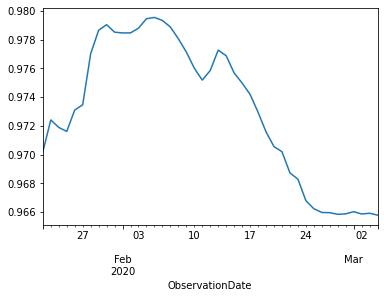

In [46]:
# Promedio diario de la tasa de supervivencia
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

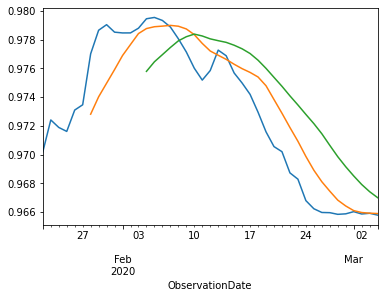

In [47]:
sr.plot()
sr.rolling(window=7).mean().plot() # Ventana que calcula el promedio cada 7 días
sr.rolling(window=14).mean().plot() # Cada 14 días

In [48]:
import numpy as np

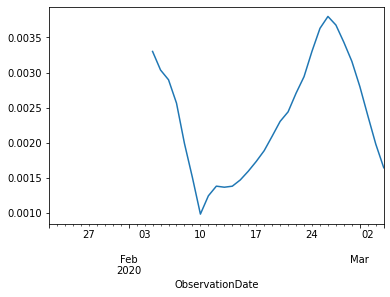

In [49]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot() # St sobre la tasa

Ver cúal pais tiene más ocurrencias 

In [50]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [51]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

Agrupamos por pais y por la fecha de observacion, con una frecuencia de un día y sumamos los datos (casos por día)

In [52]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

Nuevo df con sólo los datos de china

In [56]:
df_china = df_time.loc['Mainland China',:]

In [57]:
df_china.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


In [58]:
import matplotlib.pyplot as plt

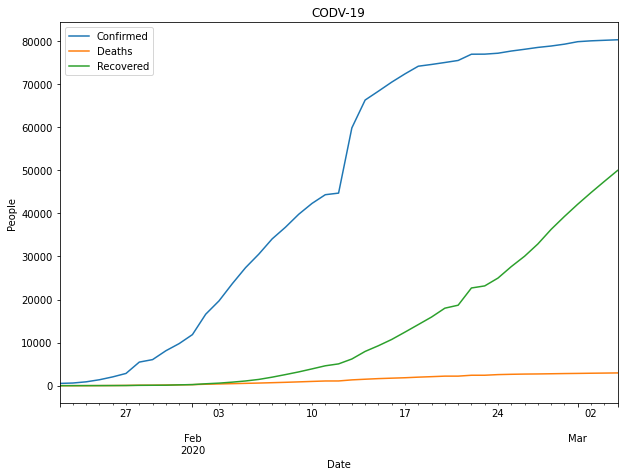

In [59]:
df_china.plot(figsize = (10,7), title = 'CODV-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

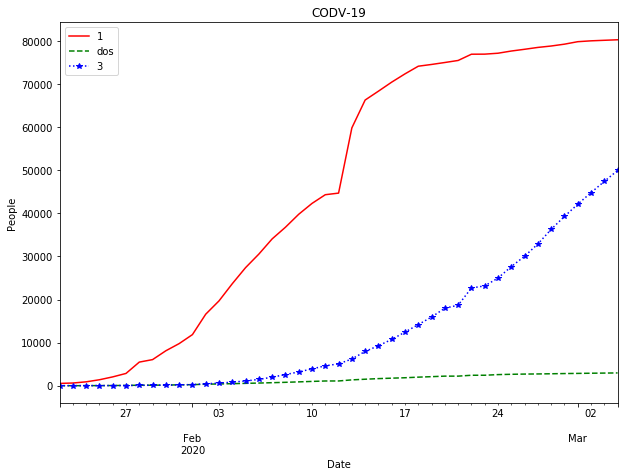

In [ ]:
ax = df_china.plot(figsize = (10,7), title = 'CODV-19',
              legend = False,
              style = ['r-','g--','b:*'])
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

Df con máximo mensual de cada columna

In [ ]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


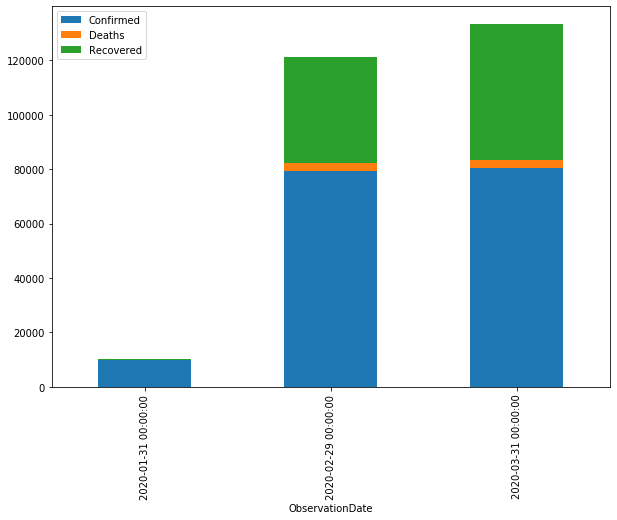

In [ ]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True)

Nueva variable con las personas que están recibiendo tratamiento

In [ ]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efcd369d550>,
      dtype=object)

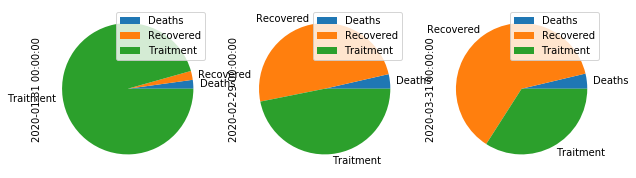

In [ ]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True)

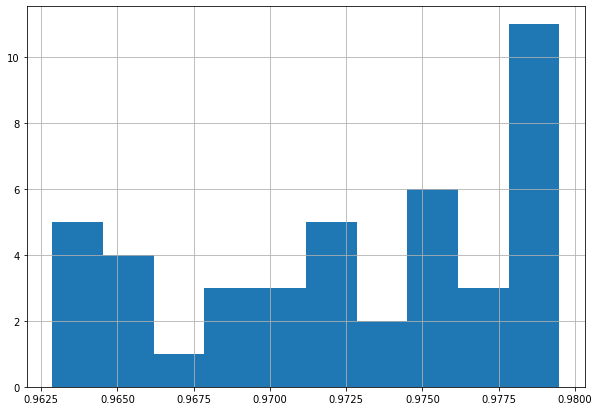

In [ ]:
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins = 10)

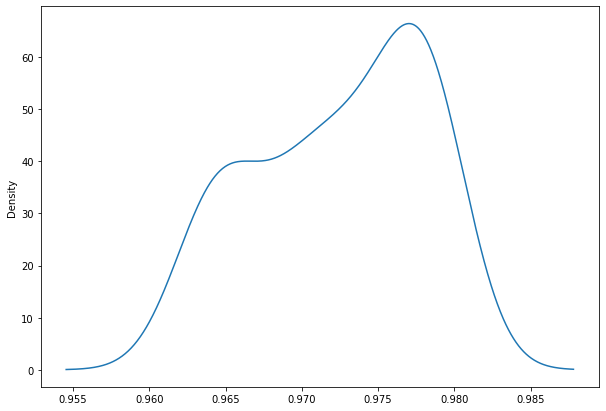

In [ ]:
df_china['rate'].plot(kind = 'kde', figsize = (10,7))